In [49]:
# Import packages
library(bnlearn)
library(visNetwork)

## Read in data

In [70]:
# Read in continuous data
data_cont = read.csv(file="../data/DataMatrices/Vansjo_Seasonal_Continuous.csv", header=TRUE, sep=",", row.names = 1)
head(data_cont)

,chla_prevSummer,colour_prevSummer,cyano_prevSummer,rainy_days_winter,TP_prevSummer,chla_ES,colour_ES,cyano_ES,rain_ES,TP_ES,chla_LS,colour_LS,cyano_LS,temp_LS,TP_LS,windDays_under_Q0.4_LS,windDays_over_Q0.6_LS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1980,NA,NA,NA,NA,NA,12.169127,NA,NA,242.1992,36.08413,20.773333,NA,NA,9.575229,51.06190,38,33
1981,16.471230,NA,NA,102,43.57302,7.075000,NA,NA,282.2578,23.58333,9.587500,NA,NA,9.937926,34.08333,41,29
1982,8.331250,NA,NA,105,28.83333,5.466667,NA,NA,151.0062,37.77778,6.229167,26.66667,NA,10.870945,18.89583,28,47
1983,5.847917,26.66667,NA,121,28.33681,5.980000,19.40000,NA,182.7288,31.96000,6.166667,14.66667,NA,10.877162,26.15000,25,51
1984,6.073333,17.03333,NA,121,29.05500,10.230000,NA,NA,255.8206,27.36000,11.950000,NA,NA,10.635043,25.69500,35,31
1985,11.090000,NA,NA,138,26.52750,9.977778,34.11111,NA,236.4939,36.60000,13.333333,34.62500,NA,9.159237,26.72500,39,40


In [71]:
# Read in discretized data

# Discretized, class boundaries determined using regression trees, WFD classification boundaries and scatter plots
data_disc_rt = read.csv(file="../data/DataMatrices/Vansjo_Seasonal_Discretized_RegTree.csv", header=TRUE, sep=",", row.names = 1)

# Convert from factors to ordered factors
data_disc_rt$TP_ES <- factor(data_disc_rt$TP_ES, order = TRUE, levels = c('L','M','H'))
data_disc_rt$TP_LS <- factor(data_disc_rt$TP_LS, order = TRUE, levels=c('VL','L','M','H'))
data_disc_rt$TP_prevSummer <- factor(data_disc_rt$TP_prevSummer, order = TRUE, levels=c('L','M','H'))
data_disc_rt$chla_ES <- factor(data_disc_rt$chla_ES, order = TRUE, levels=c('L','M','H'))
data_disc_rt$chla_LS <- factor(data_disc_rt$chla_LS, order = TRUE, levels=c('L','M','H'))
data_disc_rt$chla_prevSummer <- factor(data_disc_rt$chla_prevSummer, order = TRUE, levels=c('L','H'))
data_disc_rt$colour_ES <- factor(data_disc_rt$colour_ES, order = TRUE, levels=c('L','M','H'))
data_disc_rt$colour_LS <- factor(data_disc_rt$colour_LS, order = TRUE, levels=c('L','M','H'))
data_disc_rt$colour_prevSummer <- factor(data_disc_rt$colour_prevSummer, order = TRUE, levels=c('L','M','H'))
data_disc_rt$cyano_ES <- factor(data_disc_rt$cyano_ES, order = TRUE, levels=c('L','M','H'))
data_disc_rt$cyano_LS <- factor(data_disc_rt$cyano_LS, order = TRUE, levels=c('L','M','H'))
data_disc_rt$cyano_prevSummer <- factor(data_disc_rt$cyano_prevSummer, order = TRUE, levels=c('L','H'))
data_disc_rt$rain_ES <- factor(data_disc_rt$rain_ES, order = TRUE, levels=c('L','H'))
data_disc_rt$rainy_days_winter <- factor(data_disc_rt$rainy_days_winter, order = TRUE, levels=c('L','H'))
data_disc_rt$temp_LS <- factor(data_disc_rt$temp_LS, order = TRUE, levels=c('L','H'))
data_disc_rt$windDays_over_Q0.6_LS <- factor(data_disc_rt$windDays_over_Q0.6_LS, order = TRUE, levels=c('L','H'))
data_disc_rt$windDays_under_Q0.4_LS <- factor(data_disc_rt$windDays_under_Q0.4_LS, order = TRUE, levels=c('L','H'))

# Discretized, terciles
data_disc_terc = read.csv(file="../data/DataMatrices/Vansjo_Seasonal_Discretized_Terciles.csv", header=TRUE, sep=",", row.names = 1)

# Again, convert factors to ordered factors. NOT WORKING YET.
# ordered = apply(data_disc_terc, 2, factor, order=TRUE, levels=c('L','M','H'))
# head(ordered) # Returns a matrix. If try to return it as a dataframe, it's just factors again...

# Quick look at output
head(data_disc_rt)

,chla_prevSummer,colour_prevSummer,cyano_prevSummer,rainy_days_winter,TP_prevSummer,chla_ES,colour_ES,cyano_ES,rain_ES,TP_ES,chla_LS,colour_LS,cyano_LS,temp_LS,TP_LS,windDays_under_Q0.4_LS,windDays_over_Q0.6_LS
,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>
1980,NA,NA,NA,NA,NA,M,NA,NA,H,M,H,NA,NA,L,H,L,L
1981,L,NA,NA,L,H,L,NA,NA,H,L,L,NA,NA,L,M,L,L
1982,L,NA,NA,L,M,L,NA,NA,L,M,L,L,NA,L,VL,L,H
1983,L,NA,NA,L,M,L,L,NA,L,M,L,L,NA,L,L,L,H
1984,L,NA,NA,L,M,L,NA,NA,H,L,M,NA,NA,L,L,L,L
1985,L,NA,NA,L,M,L,M,NA,H,M,M,M,NA,L,L,L,H


## Define DAG structure

In [72]:
# Create an empty DAG with the desired nodes

nodes = c('TP_ES',
         'TP_LS',
         'TP_prevSummer',
         'chla_ES',
         'chla_LS',
         'chla_prevSummer',
         'colour_ES',
         'colour_LS',
         'colour_prevSummer',
         'cyano_ES',
         'cyano_LS',
         'cyano_prevSummer',
         'rain_ES',
         'rainy_days_winter',
         'temp_LS',
         'windDays_over_Q0.6_LS',
         'windDays_under_Q0.4_LS')

dag = empty.graph(nodes)

# Manually define the arcs connecting nodes
arcs_matrix = matrix(c('TP_prevSummer','TP_ES',
                       'TP_prevSummer','TP_LS',

                       'TP_ES','chla_ES',                   
                       'chla_prevSummer','chla_ES',
                       'rainy_days_winter','chla_ES',
                       'chla_ES','chla_LS',
                       'TP_LS','chla_LS',
                       'windDays_over_Q0.6_LS','chla_LS',

                       'cyano_prevSummer','cyano_ES',
                       'chla_ES','cyano_ES',
                       'colour_ES','cyano_ES',
                       'cyano_ES','cyano_LS',
                       'chla_LS','cyano_LS',
                       'windDays_under_Q0.4_LS','cyano_LS',
                       'temp_LS','cyano_LS',
                       'colour_LS','cyano_LS',

                       'colour_prevSummer','colour_ES',
                       'rain_ES','colour_ES',
                       'rain_ES','colour_LS',
                       'colour_ES','colour_LS'),
                     
                        ncol = 2, byrow = TRUE,
                        dimnames = list(NULL, c("from", "to"))) #assign the DAG structure (as an attribute of asia)
arcs_matrix

from,to
TP_prevSummer,TP_ES
TP_prevSummer,TP_LS
TP_ES,chla_ES
chla_prevSummer,chla_ES
rainy_days_winter,chla_ES
chla_ES,chla_LS
TP_LS,chla_LS
windDays_over_Q0.6_LS,chla_LS
cyano_prevSummer,cyano_ES
chla_ES,cyano_ES


In [73]:
# Assign the structure to the empty graph using arcs, which turns it into a bnlearn object
arcs(dag) = arcs_matrix
dag


  Random/Generated Bayesian network

  model:
   [TP_prevSummer][chla_prevSummer][colour_prevSummer][cyano_prevSummer]
   [rain_ES][rainy_days_winter][temp_LS][windDays_over_Q0.6_LS]
   [windDays_under_Q0.4_LS][TP_ES|TP_prevSummer][TP_LS|TP_prevSummer]
   [colour_ES|colour_prevSummer:rain_ES]
   [chla_ES|TP_ES:chla_prevSummer:rainy_days_winter]
   [colour_LS|colour_ES:rain_ES][chla_LS|TP_LS:chla_ES:windDays_over_Q0.6_LS]
   [cyano_ES|chla_ES:colour_ES:cyano_prevSummer]
   [cyano_LS|chla_LS:colour_LS:cyano_ES:temp_LS:windDays_under_Q0.4_LS]
  nodes:                                 17 
  arcs:                                  20 
    undirected arcs:                     0 
    directed arcs:                       20 
  average markov blanket size:           4.71 
  average neighbourhood size:            2.35 
  average branching factor:              1.18 

  generation algorithm:                  Empty 


In [74]:
# Plot the network. Cand do this just using plot(structure), but it doesn't look nice. Instead, use the interactive plotting package visNetwork

# Define a function to create nice interactive plots
plot.network = function(structure, ht="600px")
    {
      nodes.uniq <- unique(c(structure$arcs[,1], structure$arcs[,2]))
      nodes <- data.frame(id = nodes.uniq,
                          label = nodes.uniq,
                          color = "darkturquoise",
                          shadow = FALSE)

      edges <- data.frame(from = structure$arcs[,1],
                          to = structure$arcs[,2],
                          arrows = "to",
                          smooth = TRUE,
                          shadow = FALSE,
                          color = "black")

      return(visNetwork(nodes, edges, height = ht, width = "100%"))
    }

plot.network(dag)

HTML widgets cannot be represented in plain text (need html)

## Assume all nodes are continuous

First, lets just ignore the fact that some nodes aren't Gaussians, and have a go at fitting to the raw data

In [80]:
# Fit parameters
data_cont[1:ncol(data_cont)] = lapply(data_cont[1:ncol(data_cont)], as.numeric) # First, convert data type of integers to numeric

fit_cont = bn.fit(dag, data_cont)
fit_cont


  Bayesian network parameters

  Parameters of node TP_ES (Gaussian distribution)

Conditional density: TP_ES | TP_prevSummer
Coefficients:
  (Intercept)  TP_prevSummer  
   17.6872730      0.4045968  
Standard deviation of the residuals: 5.466635 

  Parameters of node TP_LS (Gaussian distribution)

Conditional density: TP_LS | TP_prevSummer
Coefficients:
  (Intercept)  TP_prevSummer  
    9.7869169      0.6330806  
Standard deviation of the residuals: 4.497544 

  Parameters of node TP_prevSummer (Gaussian distribution)

Conditional density: TP_prevSummer
Coefficients:
(Intercept)  
   29.83405  
Standard deviation of the residuals: 4.965362 

  Parameters of node chla_ES (Gaussian distribution)

Conditional density: chla_ES | TP_ES + chla_prevSummer + rainy_days_winter
Coefficients:
      (Intercept)              TP_ES    chla_prevSummer  rainy_days_winter  
      -24.2887686          0.3510231          0.3912290          0.1597862  
Standard deviation of the residuals: 4.359516 



In [76]:
# bn.fit.qqplot(data_cont)

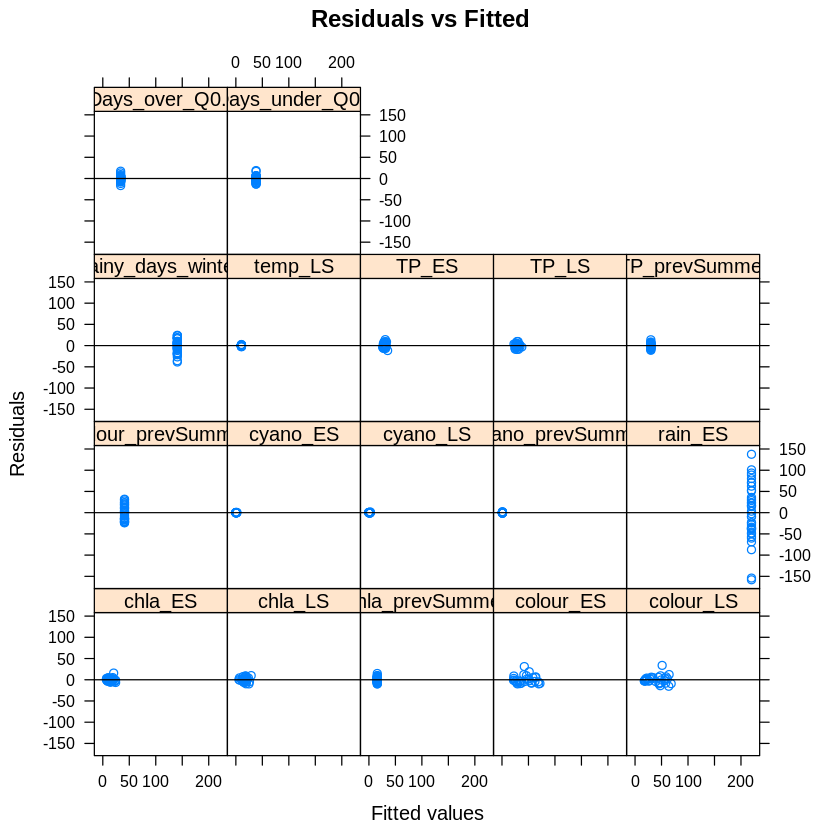

In [87]:
bn.fit.xyplot(fit_cont)

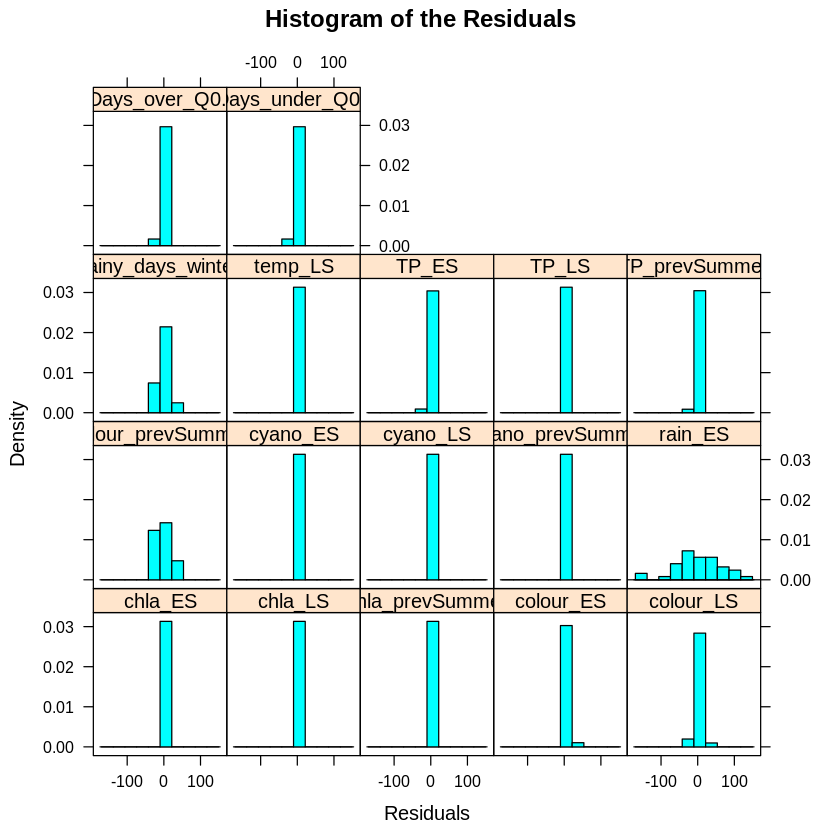

In [85]:
bn.fit.histogram(fit_cont, density=TRUE)

## Fit discrete network

In [77]:
# Get node parameter estimates (n.b. method can be maximum likelihood estimation (default)
# or 'bayes'. Can only use bayesian with discrete
fit_disc = bn.fit(dag, data_disc_rt, method='mle')
#                         replace.unidentifiable=TRUE)
fit_disc


  Bayesian network parameters

  Parameters of node TP_ES (ordinal distribution)

Conditional probability table:
 
     TP_prevSummer
TP_ES         L         M         H
    L 0.8333333 0.6250000 0.2500000
    M 0.1666667 0.3750000 0.5000000
    H 0.0000000 0.0000000 0.2500000

  Parameters of node TP_LS (ordinal distribution)

Conditional probability table:
 
     TP_prevSummer
TP_LS          L          M          H
   VL 0.33333333 0.06250000 0.00000000
   L  0.66666667 0.56250000 0.16666667
   M  0.00000000 0.37500000 0.75000000
   H  0.00000000 0.00000000 0.08333333

  Parameters of node TP_prevSummer (ordinal distribution)

Conditional probability table:
         L         M         H 
0.1944444 0.4444444 0.3611111 

  Parameters of node chla_ES (ordinal distribution)

Conditional probability table:
 
, , chla_prevSummer = L, rainy_days_winter = L

       TP_ES
chla_ES         L         M H
      L 0.5454545 0.6000000  
      M 0.4545455 0.4000000  
      H 0.0000000 0.0000000  


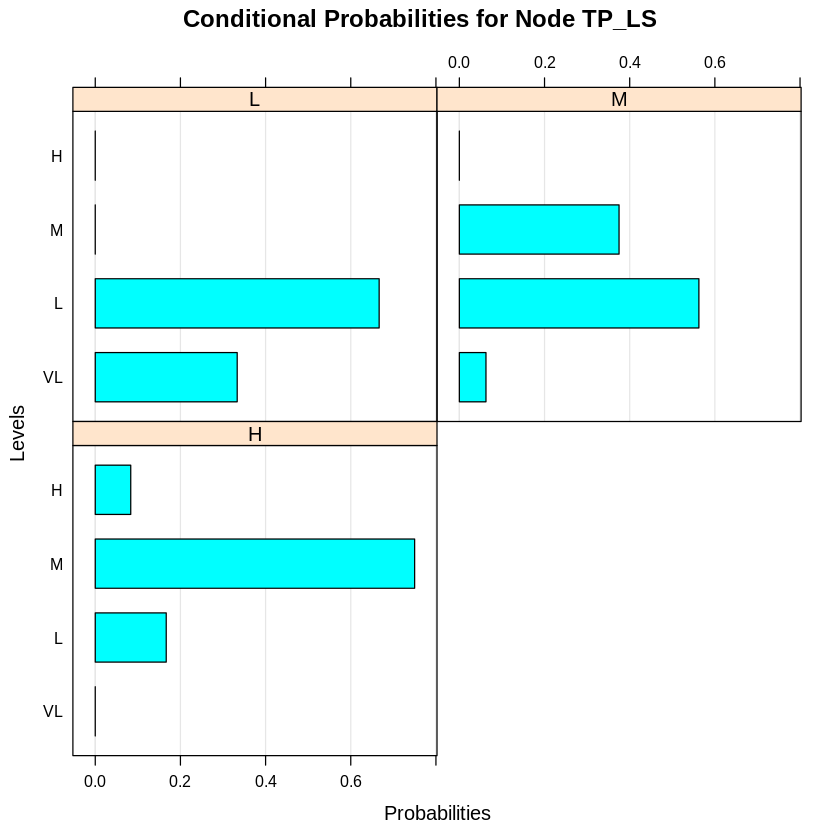

In [79]:
bn.fit.barchart(fit_disc$TP_LS)

## Cross validation of different model structures

See http://www.bnlearn.com/examples/xval/ for details

In [ ]:
bn.cv(data = data_disc_rt, # The data set the BN will be estimated from
      bn = dag, # Provide a fixed network structure here, rather than a structure learning algorithm
      method = 'k-fold', # Choose from "k-fold" (the default), "custom-fold" or "hold-out"
      loss =  ,# loss function to evaluate goodness of fit of learned network
      fit = 'mle',# the fitting method (e.g. 'mle' or 'bayes') to fit the BN parameters
     loss.args
#       fit.args # e.g. iss if using 'bayes' fitting method?
     )